# CIFAR-10 Multiple Classes

Let's go over another example of using Keras and building out CNNs. This time will use another famous data set, the CIFAR-10 dataset which consists of 10 different image types.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

Label	Description:
* 0	airplane
* 1	automobile
* 2	bird
* 3	cat
* 4	deer
* 5	dog
* 6	frog
* 7	horse
* 8	ship
* 9	truck


In [3]:
from tensorflow.keras.datasets import cifar10

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [6]:
x_train.shape

(50000, 32, 32, 3)

In [8]:
x_train[0].shape

(32, 32, 3)

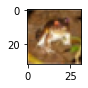

In [17]:
# frog
plt.figure(figsize = (1,1))
plt.imshow(x_train[0])
plt.show()

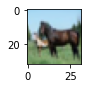

In [16]:
# HORSE
plt.figure(figsize = (1,1))
plt.imshow(x_train[12])
plt.show()

# PreProcessing

In [18]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [19]:
x_train.max()

255

In [20]:
x_train.min()

0

In [21]:
x_train = x_train/255
x_test = x_test/255

In [23]:
x_test.shape

(10000, 32, 32, 3)

In [22]:
x_train.max()

1.0

## Labels

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [27]:
y_test.shape

(10000, 1)

In [26]:
y_cat_test = to_categorical(y_test, 10)

In [28]:
y_cat_test.shape

(10000, 10)

In [29]:
y_cat_train = to_categorical(y_train, 10)

In [31]:
y_train[0]

array([6], dtype=uint8)

In [30]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

----------
# Building the Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [34]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2,2)))

# FLATTEN IMAGES FROM 32 by 32 by 3 to 3,072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

# COMPILING THE MODEL
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

In [39]:
model.fit(x_train, y_cat_train, epochs=15, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4986 - accuracy: 0.4575 - val_loss: 1.2509 - val_accuracy: 0.5535
Epoch 2/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1964 - accuracy: 0.5775 - val_loss: 1.1582 - val_accuracy: 0.5928
Epoch 3/15
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0523 - accuracy: 0.6320 - val_loss: 1.0430 - val_accuracy: 0.6302
Epoch 4/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.9455 - accuracy: 0.6693 - val_loss: 0.9973 - val_accuracy: 0.6499
Epoch 5/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8615 - accuracy: 0.6995 - val_loss: 0.9778 - val_accuracy: 0.6574
Epoch 6/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7969 - accuracy: 0.7212 - val_loss: 0.9964 - val_accuracy: 0.6620
Epoch 7/15
1563/1563 [==============================] - 56s 36ms/step - loss: 0.7348 - accuracy: 0.7420 - val_loss: 0.9479 -

## Evaluate the Model

In [40]:
metrics = pd.DataFrame(model.history.history)

In [49]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.498572,0.45754,1.250908,0.5535
1,1.196450,0.57746,1.158159,0.5928
2,1.052318,0.63204,1.042992,0.6302
3,0.945462,0.66932,0.997287,0.6499
4,0.861531,0.69950,0.977761,0.6574
5,0.796872,0.72122,0.996362,0.6620
6,0.734807,0.74198,0.947883,0.6798
7,0.672969,0.76394,1.001208,0.6771
8,0.622679,0.78252,0.975468,0.6816
9,0.579382,0.79468,1.022766,0.6847


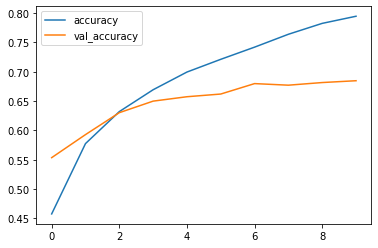

In [42]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

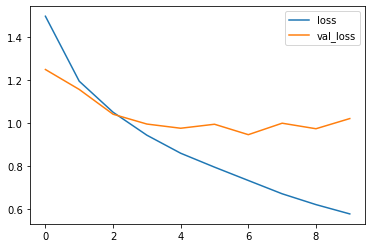

In [43]:
metrics[['loss', 'val_loss']].plot()
plt.show()

In [47]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0227662324905396, 0.6847000122070312]


In [48]:
print(model.metrics_names)
print(model.evaluate(x_train,y_cat_train,verbose=0))

['loss', 'accuracy']
[0.4916881322860718, 0.8300600051879883]


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
predictions = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [52]:
predictions_2 = np.argmax(model.predict(x_test), axis=-1)

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.66      0.71      1000
           1       0.82      0.77      0.80      1000
           2       0.56      0.59      0.58      1000
           3       0.55      0.45      0.50      1000
           4       0.62      0.65      0.63      1000
           5       0.62      0.55      0.58      1000
           6       0.66      0.84      0.74      1000
           7       0.73      0.75      0.74      1000
           8       0.73      0.85      0.79      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [54]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.79      0.66      0.71      1000
           1       0.82      0.77      0.80      1000
           2       0.56      0.59      0.58      1000
           3       0.55      0.45      0.50      1000
           4       0.62      0.65      0.63      1000
           5       0.62      0.55      0.58      1000
           6       0.66      0.84      0.74      1000
           7       0.73      0.75      0.74      1000
           8       0.73      0.85      0.79      1000
           9       0.78      0.72      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [55]:
print(confusion_matrix(y_test,predictions))

[[656  29  72  24  30   9  22  10 115  33]
 [ 16 774  16  16   7   8  21   4  59  79]
 [ 49   5 595  54  92  53  78  38  22  14]
 [ 11   9  90 452  86 155 117  41  19  20]
 [ 15   1  77  42 652  30  82  82  15   4]
 [  6   3  88 142  65 553  60  70   5   8]
 [  0   3  56  32  37   9 841  11   6   5]
 [  9   4  38  28  72  56  20 753   8  12]
 [ 40  23  12  16  10   7  13   5 846  28]
 [ 33  96  16  16   9  13  17  15  60 725]]


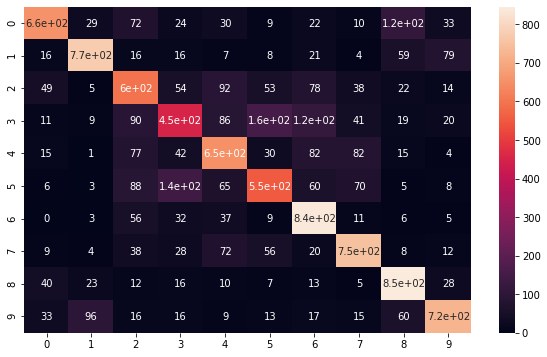

In [57]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
plt.show()

# Predicting a given image

In [61]:
my_image = x_test[16]

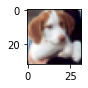

In [62]:
plt.figure(figsize=(1,1))
plt.imshow(my_image)
plt.show()

In [64]:
# SHAPE --> (num_images,width,height,color_channels)
print(np.argmax(model.predict(my_image.reshape(1,32,32,3)), axis=-1))

[5]


In [68]:
print(y_test[16])

[5]


5 is dog.

## Saving the Model

In [69]:
model.save('cifar10_10epochs.h5')